In [18]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

from lightsout.stochastic.kernel import make_exp_kernel
from lightsout.stochastic.viz import (
    get_deterministic_probs,
    get_entropy,
    get_stochastic_probs,
)

MY_WIDTH = 5.87 * 1.5  # in inches
ratio = 4 / 3  # height/width ratio
MY_HEIGHT = MY_WIDTH / ratio

print(f"Figure size: {MY_WIDTH:.2f} x {MY_HEIGHT:.2f} inches")
# Print in centimeters
print(f"Figure size: {MY_WIDTH * 2.54:.2f} x {MY_HEIGHT * 2.54:.2f} cm")

Figure size: 8.80 x 6.60 inches
Figure size: 22.36 x 16.77 cm


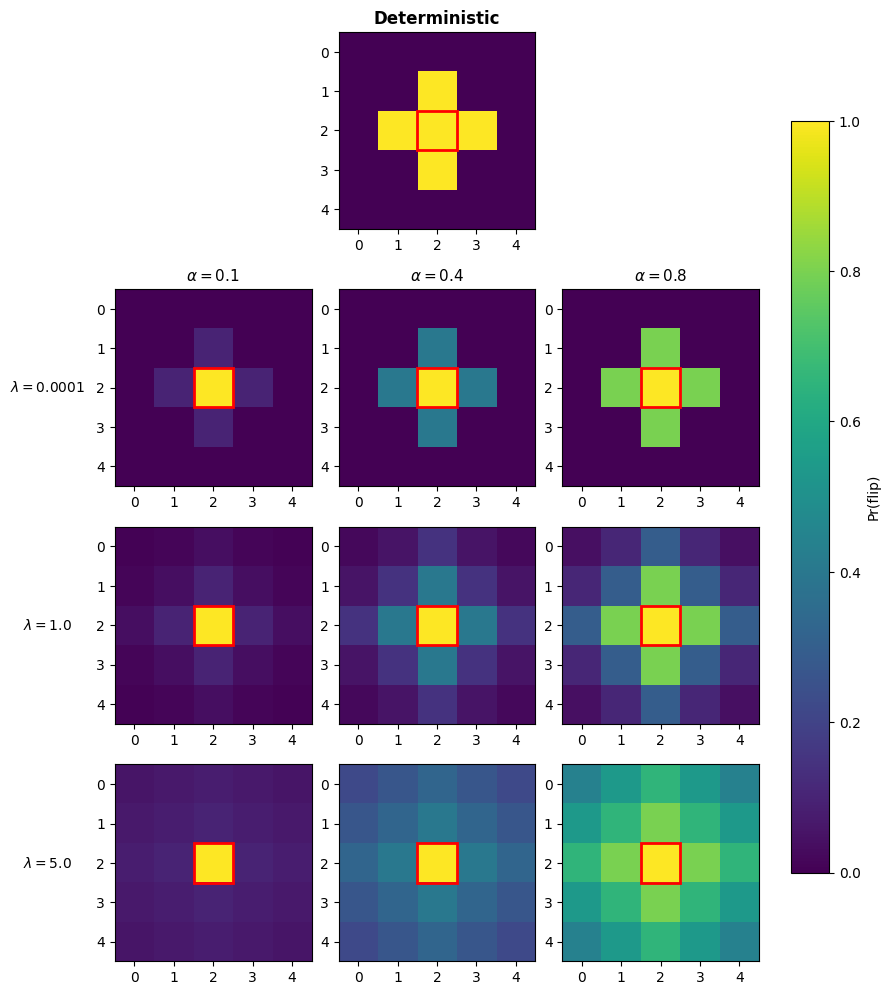

In [ ]:
# Set up the board and parameters
n = 5
middle_cell = n * n // 2  # For 5x5, this is cell 12

# Get middle cell coordinates
middle_row, middle_col = divmod(middle_cell, n)

# Representative values for plotting
alpha_values = [0.1, 0.4, 0.8]
lambda_values = [0.0001, 1.0, 5.0]

# Create subplot grid
nrows = 1 + len(lambda_values)
ncols = len(alpha_values)

fig, axes = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(MY_WIDTH, MY_HEIGHT * 1.5),
    constrained_layout=True,
)
axes = np.asarray(axes)

# Get deterministic probabilities for comparison
det_probs = get_deterministic_probs([middle_cell], n)

# Settings for heatmap visualization
heatmap_settings = dict(cmap="viridis", vmin=0.0, vmax=1.0)

# Hide all subplots in the first row initially
for col_idx in range(ncols):
    axes[0, col_idx].set_visible(False)

# Show only the middle plot in the first row (deterministic case)
det_col = 1
det_ax = axes[0, det_col]
det_ax.set_visible(True)

color_map = det_ax.imshow(det_probs, **heatmap_settings)
det_ax.add_patch(
    Rectangle(
        (middle_col - 0.5, middle_row - 0.5),
        1,
        1,
        edgecolor="red",
        facecolor="none",
        linewidth=2,
    )
)
det_ax.set_title("Deterministic", fontsize=12, fontweight="bold")
det_ax.set_xticks(range(n))
det_ax.set_yticks(range(n))

# Plot stochastic cases for each lambda value
for i, lam in enumerate(lambda_values, start=1):
    # Add lambda label on the left
    axes[i, 0].set_ylabel(
        rf"$\lambda={lam}$", rotation=0, labelpad=35, va="center"
    )

    # Plot each alpha value
    for j, a in enumerate(alpha_values):
        ax = axes[i, j]

        kernel = make_exp_kernel(n=n, alpha=a, lam=lam)
        probs = get_stochastic_probs(kernel, [middle_cell], n)

        ax.imshow(probs, **heatmap_settings)
        ax.add_patch(
            Rectangle(
                (middle_col - 0.5, middle_row - 0.5),
                1,
                1,
                edgecolor="red",
                facecolor="none",
                linewidth=2,
            )
        )

        # Add alpha labels as column titles
        if i == 1:
            ax.set_title(rf"$\alpha={a}$", fontsize=11)

        ax.set_xticks(range(n))
        ax.set_yticks(range(n))

plt.colorbar(
    color_map, ax=axes, label="Pr(flip)", orientation="vertical", shrink=0.8
)
plt.savefig(
    "../results/plots/stochastic_center_flip_probs.pdf",
    dpi=300,
    bbox_inches="tight",
)
plt.show()

Random cells pressed: [14  0 17  6]


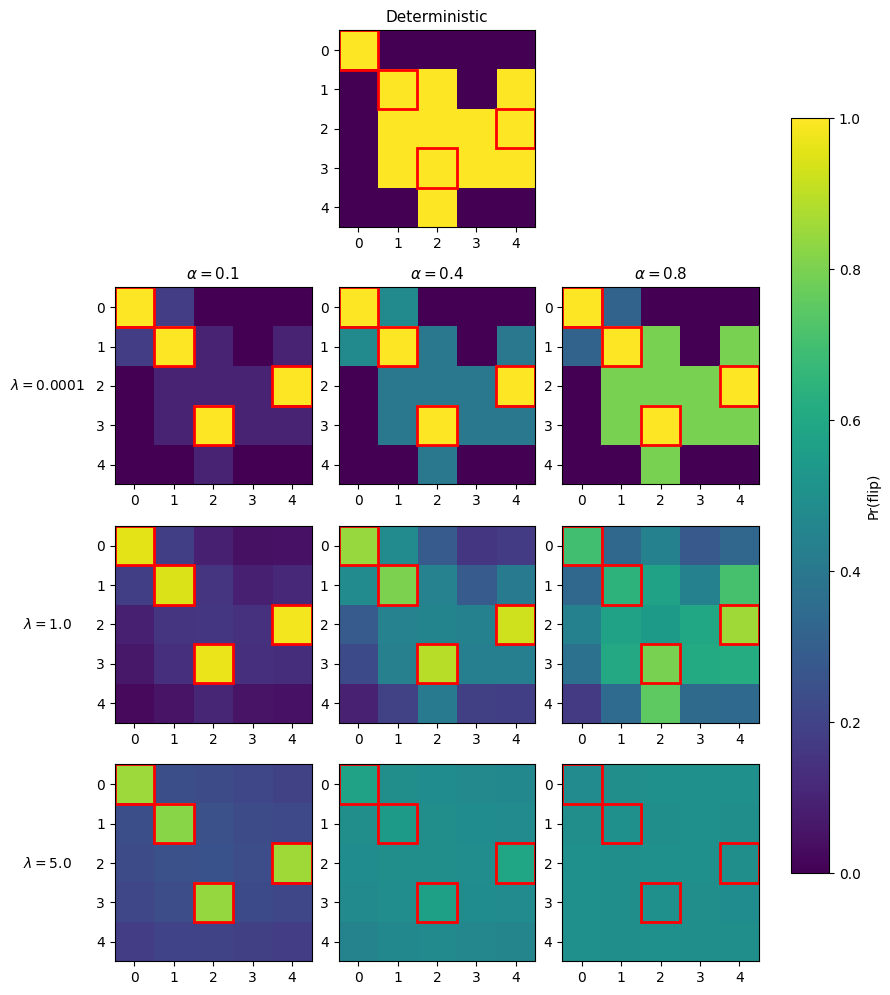

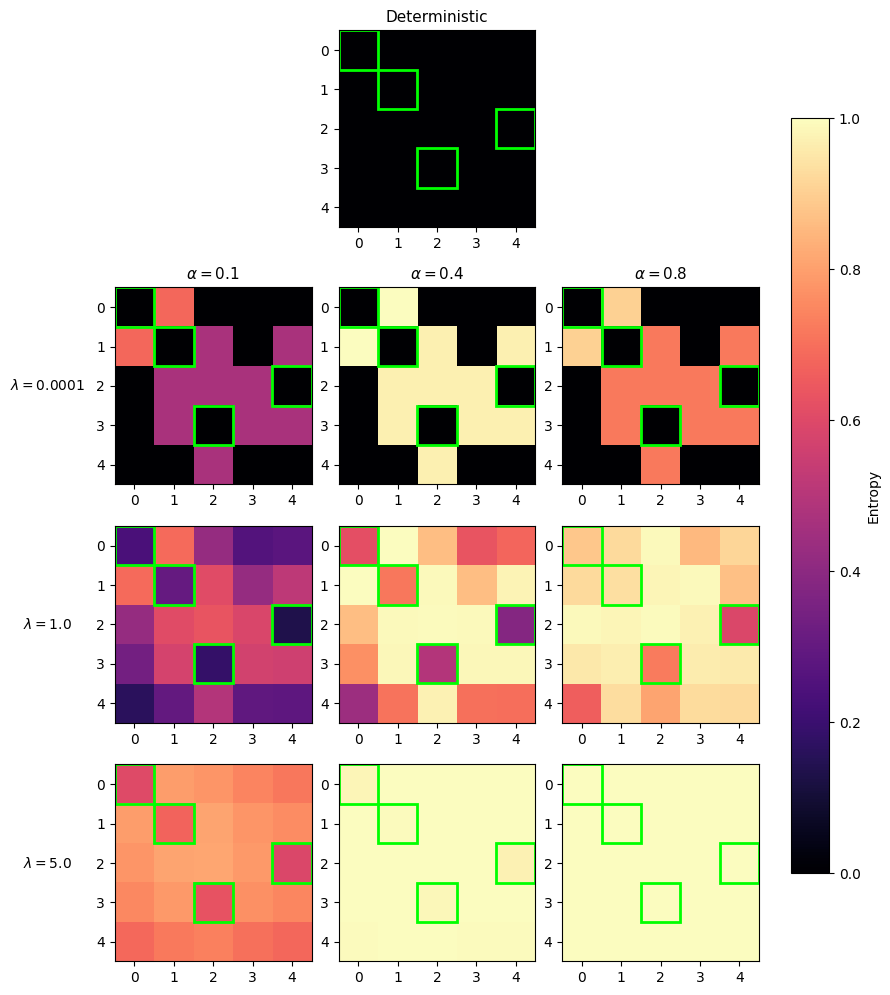

In [ ]:
# Generate random actions (cells to press)
np.random.seed(2)
pressed_cells = np.random.choice(n * n, size=4, replace=False)
print(f"Random cells pressed: {pressed_cells}")

fig, axes = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(MY_WIDTH, MY_HEIGHT * 1.5),
    constrained_layout=True,
)
axes = np.asarray(axes)

det_probs = get_deterministic_probs(pressed_cells, n)

# Set up deterministic case
for j in range(ncols):
    axes[0, j].set_visible(False)

det_ax = axes[0, det_col]
det_ax.set_visible(True)

color_map = det_ax.imshow(det_probs, **heatmap_settings)
for cell in pressed_cells:
    cell_row, cell_col = divmod(cell, n)
    det_ax.add_patch(
        Rectangle(
            (cell_col - 0.5, cell_row - 0.5),
            1,
            1,
            edgecolor="red",
            facecolor="none",
            linewidth=2,
        )
    )
det_ax.set_title("Deterministic", fontsize=11)
det_ax.set_xticks(range(n))
det_ax.set_yticks(range(n))

# Generate stochastic plots
for i, lam in enumerate(lambda_values, start=1):
    # Row label on the left-most alpha column
    axes[i, 0].set_ylabel(
        rf"$\lambda={lam}$", rotation=0, labelpad=35, va="center"
    )

    for j, a in enumerate(alpha_values):
        ax = axes[i, j]

        kernel = make_exp_kernel(n=n, alpha=a, lam=lam)
        probs = get_stochastic_probs(kernel, pressed_cells, n)

        ax.imshow(probs, **heatmap_settings)
        for cell in pressed_cells:
            cell_row, cell_col = divmod(cell, n)
            ax.add_patch(
                Rectangle(
                    (cell_col - 0.5, cell_row - 0.5),
                    1,
                    1,
                    edgecolor="red",
                    facecolor="none",
                    linewidth=2,
                )
            )

        if i == 1:
            ax.set_title(rf"$\alpha={a}$", fontsize=11)

        ax.set_xticks(range(n))
        ax.set_yticks(range(n))

plt.colorbar(
    color_map, ax=axes, label="Pr(flip)", orientation="vertical", shrink=0.8
)
plt.savefig(
    "../results/plots/stochastic_random_flip_probs.pdf",
    dpi=300,
    bbox_inches="tight",
)
plt.show()

# Create entropy visualization (shows uncertainty in flip probabilities)
entropy_settings = dict(cmap="magma", vmin=0.0, vmax=1.0)

fig, axes = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(MY_WIDTH, MY_HEIGHT * 1.5),
    constrained_layout=True,
)
axes = np.asarray(axes)

# Prepare entropy data
det_entropy = get_entropy(det_probs)

# Deterministic row
for j in range(ncols):
    axes[0, j].set_visible(False)

ax_det = axes[0, det_col]
ax_det.set_visible(True)

color_map = ax_det.imshow(det_entropy, **entropy_settings)
for cell in pressed_cells:
    cell_row, cell_col = divmod(cell, n)
    ax_det.add_patch(
        Rectangle(
            (cell_col - 0.5, cell_row - 0.5),
            1,
            1,
            edgecolor="lime",
            facecolor="none",
            linewidth=2,
        )
    )

ax_det.set_title("Deterministic", fontsize=11)
ax_det.set_xticks(range(n))
ax_det.set_yticks(range(n))

# Generate entropy plots for stochastic cases
for i, lam in enumerate(lambda_values, start=1):
    # Row label on the first visible alpha column
    axes[i, 0].set_ylabel(
        rf"$\lambda={lam}$", rotation=0, labelpad=35, va="center"
    )

    for j, a in enumerate(alpha_values):
        ax = axes[i, j]

        kernel = make_exp_kernel(n=n, alpha=a, lam=lam)
        probs = get_stochastic_probs(kernel, pressed_cells, n)
        entropy_values = get_entropy(probs)

        ax.imshow(entropy_values, **entropy_settings)

        for cell in pressed_cells:
            cell_row, cell_col = divmod(cell, n)
            ax.add_patch(
                Rectangle(
                    (cell_col - 0.5, cell_row - 0.5),
                    1,
                    1,
                    edgecolor="lime",
                    facecolor="none",
                    linewidth=2,
                )
            )

        if i == 1:
            ax.set_title(rf"$\alpha={a}$", fontsize=11)

        ax.set_xticks(range(n))
        ax.set_yticks(range(n))

plt.colorbar(
    color_map, ax=axes, label="Entropy", orientation="vertical", shrink=0.8
)
plt.savefig(
    "../results/plots/stochastic_random_entropy.pdf",
    dpi=300,
    bbox_inches="tight",
)
plt.show()